In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('adult.csv/adult.csv')

In [8]:
df = df.drop(columns ='fnlwgt')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [12]:
cat_cols = df.select_dtypes(include = ['object']).columns

In [14]:
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [16]:
df_41_50 = df[(df['age']>=41) & (df['age']<=50)]
df_41_50 = df[(df['age']>=41) & (df['age']<=50)]

In [26]:
perc_df_41_50 = df_41_50['income'].value_counts(normalize = True)['>50K'] * 100

In [28]:
salary_education = df.groupby('education')['income'].value_counts(normalize = True).unstack()

In [32]:
salary_education['>50K'] = salary_education['>50K']*100

In [48]:
salary_education = salary_education.sort_values(by = '>50K',ascending=False)

(0.0, 100.0)

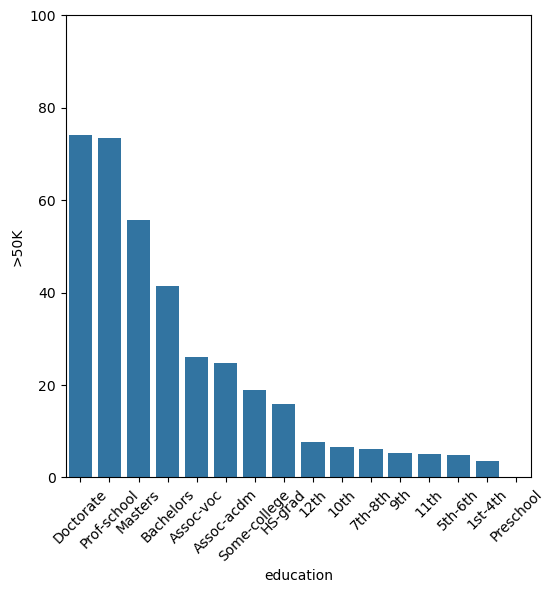

In [52]:
plt.figure(figsize = (6,6))

sns.barplot(x=salary_education.index, y=salary_education['>50K'])
plt.xticks(rotation=45)
plt.ylim(0,100)

In [56]:
average_hours = df.groupby('income')['hours.per.week'].mean()

In [58]:
average_hours

income
<=50K    38.840210
>50K     45.473026
Name: hours.per.week, dtype: float64

In [64]:
le  = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [66]:
clustering_data = df.drop(columns = ['capital.gain', 'capital.loss', 'native.country'])
inertias = []
iterations = range(2, 10)
for k in iterations:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clustering_data)
    inertias.append(np.sqrt(kmeans.inertia_))

In [70]:
from kneed import KneeLocator

knee_locator = KneeLocator(iterations, inertias, curve="convex", direction="decreasing")

In [72]:
print(f"k: {knee_locator.knee}, WSS: {inertias[knee_locator.knee - 1]}")


k: 5, WSS: 2013.3477357258466


In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)

In [80]:
labels = KMeans(init="k-means++", n_clusters=4, random_state=42).fit_predict(reduced_data)

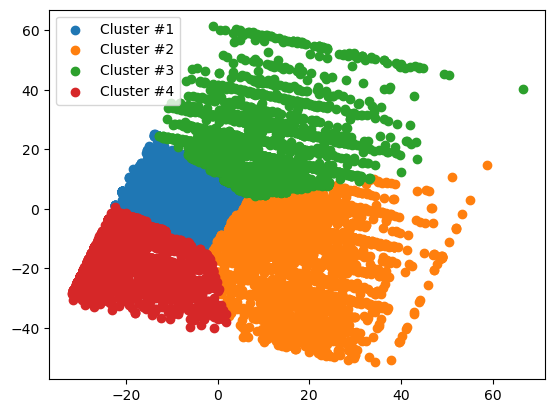

In [84]:
for label in np.unique(labels):
    plt.scatter(
        reduced_data[labels == label, 0],
        reduced_data[labels == label, 1],
        label=f"Cluster #{label + 1}"
    )
    plt.legend()

In [86]:
df.groupby('income')['hours.per.week'].mean()

income
0    38.840210
1    45.473026
Name: hours.per.week, dtype: float64